In [234]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = 'white')
from sklearn.preprocessing import LabelEncoder


In [235]:
company_data = pd.read_csv("../data/company_data.csv",sep=",")
pd.set_option("display.max_columns", None)
company_data

,Unnamed: 0,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Employee Turnover,6.0,8.0,4.0,8.0,9.0,10.0,12.0,11.0,4.0,19,16
1,Job Satisfaction,3.4,3.5,3.3,3.6,3.6,3.4,3.4,3.2,3.0,2.5,2.7
2,Job Applications Per Opening,24.0,28.0,30.0,32.0,32.0,27.0,22.0,25.0,17.0,12,8
3,Number of Employees,2588.0,2650.0,2788.0,2913.0,3045.0,3182.0,3325.0,3474.0,3631.0,3794,3965
4,Acquisition Cost Per Employee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"₹15,000.00","₹30,000.00"


Employee Turnover is % turnover

In [236]:
def pivot_company_data(company_data):
    df = company_data.T.copy()
    df.columns = df.iloc[0]
    df = df.iloc[1:]
    df = df.reset_index().rename(columns = {'index': 'Year'})
    df = df.drop(columns='Acquisition Cost Per Employee')

    int_cols = ['Job Satisfaction']
    float_cols = ['Employee Turnover','Job Applications Per Opening', 'Number of Employees']
    df[int_cols] = df[int_cols].astype(np.number)
    df[float_cols] = df[float_cols].astype(int)


    return df

company_data = pivot_company_data(company_data)
company_data

Unnamed: 0,Year,Employee Turnover,Job Satisfaction,Job Applications Per Opening,Number of Employees
0,2012,6,3.4,24,2588
1,2013,8,3.5,28,2650
2,2014,4,3.3,30,2788
3,2015,8,3.6,32,2913
4,2016,9,3.6,32,3045
5,2017,10,3.4,27,3182
6,2018,12,3.4,22,3325
7,2019,11,3.2,25,3474
8,2020,4,3.0,17,3631
9,2021,19,2.5,12,3794


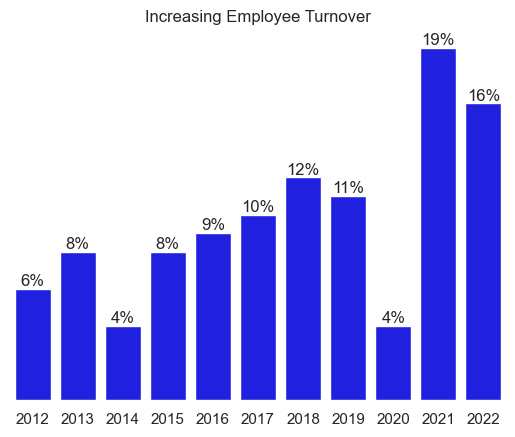

In [258]:
fig, ax = plt.subplots() # initializes figure and plots
sns.barplot(data=company_data,  x = 'Year', y = 'Employee Turnover', ax = ax, color = 'blue')
for i in ax.containers:
    ax.bar_label(i,fmt='%.0f%%')

ax.get_yaxis().set_visible(False)
plt.ylabel(None)
plt.xlabel(None)
plt.title('Increasing Employee Turnover')

sns.despine(left=True, bottom=True)
plt.show(); # shows the plot.

In [189]:
# fig, ax = plt.subplots() # initializes figure and plots
# sns.lineplot(data=company_data,  x = 'Year', y = 'Job Satisfaction', ax = ax, color = 'red') # plots the second set, and sets to ax2.
# plt.show(); # shows the plot.

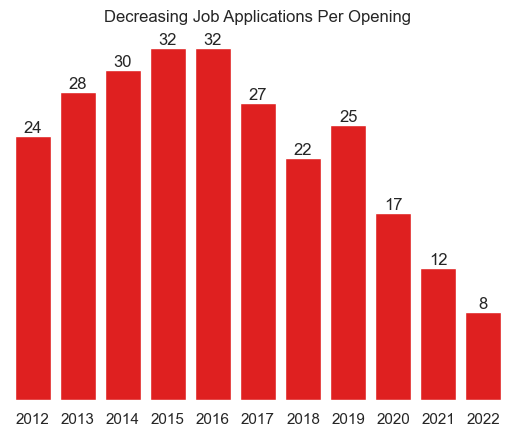

In [299]:
fig, ax = plt.subplots() # initializes figure and plots
sns.barplot(data=company_data,  x = 'Year', y = 'Job Applications Per Opening', ax = ax, color = 'red') # plots the second set, and sets to ax2.
for i in ax.containers:
    ax.bar_label(i)

ax.get_yaxis().set_visible(False)
plt.ylabel('Job Applications Per Opening')
plt.xlabel(None)
plt.title('Decreasing Job Applications Per Opening')
sns.despine(left=True, bottom=True)
plt.show(); # shows the plot.

In [269]:
# fig, ax1 = plt.subplots() # initializes figure and plots

# ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis.

# sns.barplot(data=company_data,  x = 'Year', y = 'Job Applications Per Opening', ax = ax1, color = 'red') # plots the second set, and sets to ax2.
# sns.lineplot(data=company_data,  x = 'Year', y = 'Job Satisfaction', ax = ax2, color = 'black') # plots the second set, and sets to ax2.

# # these lines add the annotations for the plot.
# ax1.set_ylabel('Job Applications Per Opening', color='red')
# # ax2.set_ylabel('Job Satifaction', color='black')


# for i in ax1.containers:
#     ax1.bar_label(i)

# ax1.get_yaxis().set_visible(False)
# # plt.ylabel(None)
# plt.xlabel(None)
# plt.title('Decreased interest in working at Acme Aroma')

# sns.despine(left=True, bottom=True)
# plt.show(); # shows the plot.

# Viz 1 (company data - yearly)
- Plot yearly employee turnover (left y, line)
- Plot yearly job satisfaction (right y, line)

- Applications per opening (separate plot, bar below)

In [2]:
data = pd.read_csv("../data/general_data.csv",sep=",")
pd.set_option("display.max_columns", None)
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,No,51,Travel_Rarely,Sales,5,2,Life_Sciences,1,1,Female,1,Healthcare_Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,1,3,3.0,4.0,3.0
1,No,32,Travel_Frequently,Research_Development,14,4,Other,1,3,Male,4,Sales_Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,2,3.0,2.0,2.0
2,No,38,Non-Travel,Research_Development,2,5,Life_Sciences,1,4,Male,3,Human_Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,3,4,2.0,2.0,4.0
3,No,32,Travel_Rarely,Research_Development,8,1,Medical,1,5,Male,1,Sales_Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,1,3,4.0,4.0,3.0
4,No,46,Travel_Rarely,Research_Development,6,3,Life_Sciences,1,6,Female,4,Research_Director,Married,40710,3.0,Y,13,8,0,28.0,5,7,7,7,3,3,4.0,3.0,2.0


# Viz 2 (survey data - attrition by job role / department)

Which job roles/department have the highest attrition rates?

In [5]:
#Attrition is dependent var
label_encoder_y=LabelEncoder()
data['Attrition']=label_encoder_y.fit_transform(data['Attrition'])

In [105]:
att_count = data[['Attrition', 'JobRole']].groupby('JobRole').sum().reset_index().rename(columns={'Attrition': 'count'})
att_count

,JobRole,count
0,Healthcare_Representative,57
1,Human_Resources,21
2,Laboratory_Technician,126
3,Manager,42
4,Manufacturing_Director,48
5,Research_Director,57
6,Research_Scientist,159
7,Sales_Executive,165
8,Sales_Representative,36


In [106]:
#Get percent attrition
def prcnt_attrition(column):
    df = round(data[['Attrition', column]].groupby(column).sum() / data[['Attrition', column]].groupby(column).count(),2)
    df = df.reset_index().rename(columns={'Attrition': 'prcnt'})
    # df = df.sort_values('Attrition', ascending=False)
    return df

# High level attrition data
    - prcnt (raw)

In [109]:
att_prcnt = prcnt_attrition('JobRole')

In [289]:
att_prcnt['count'] = att_count['count']
att_prcnt = att_prcnt.sort_values(['prcnt'], ascending= False)
att_prcnt['JobRole'] = att_prcnt['JobRole'].str.replace('_', ' ')
att_prcnt['prcnt'] = att_prcnt['prcnt'] * 100
att_prcnt

,JobRole,prcnt,count
5,Research Director,24.0,57
6,Research Scientist,18.0,159
7,Sales Executive,17.0,165
2,Laboratory Technician,16.0,126
0,Healthcare Representative,15.0,57
3,Manager,14.0,42
8,Sales Representative,14.0,36
1,Human Resources,13.0,21
4,Manufacturing Director,11.0,48


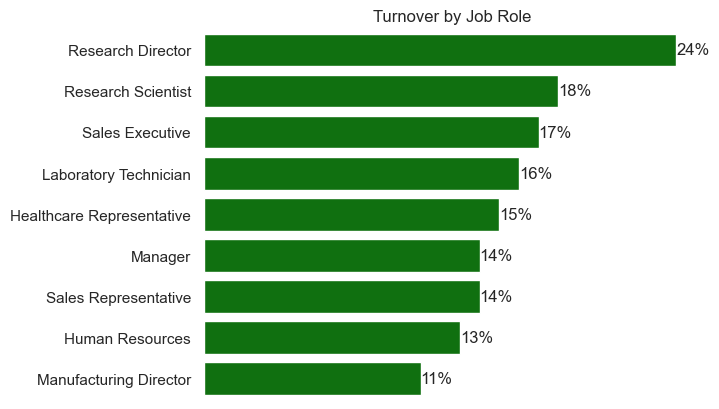

In [290]:
fig, ax = plt.subplots() # initializes figure and plots
sns.barplot(data=att_prcnt,  x = 'prcnt', y = 'JobRole', ax = ax, color = 'green') # plots the second set, and sets to ax2.
plt.ylabel(None)
plt.xlabel(None)
plt.title('Attrition by Job Role')


for i in ax.containers:
    ax.bar_label(i, fmt='%.0f%%')



ax.get_xaxis().set_visible(False)
plt.xlabel(None)
plt.title('Turnover by Job Role')
sns.despine(left=True, bottom=True)


plt.show(); # shows the plot.

In [30]:
prcnt_attrition('Department')

,Attrition
Department,
Human_Resources,0.30
Research_Development,0.16
Sales,0.15


## Drill into data

In [45]:
dr_attrition_counts = data[['Attrition', 'Department', 'JobRole']].groupby(['Department', 'JobRole']).sum()
dr_attrition_totals= data[['Attrition', 'Department', 'JobRole']].groupby(['Department', 'JobRole']).count()
dr_attrition_prcnt = round(dr_attrition_counts / dr_attrition_totals,2)
dr_attrition_prcnt


Attrition
Department           JobRole                             
Human_Resources      Healthcare_Representative       0.33
                     Human_Resources                 0.00
                     Laboratory_Technician           0.46
                     Manager                         0.33
                     Manufacturing_Director          0.25
                     Research_Director               0.00
                     Research_Scientist              0.08
                     Sales_Executive                 0.44
                     Sales_Representative            0.00
Research_Development Healthcare_Representative       0.08
                     Human_Resources                 0.17
                     Laboratory_Technician           0.15
                     Manager                         0.12
                     Manufacturing_Director          0.13
                     Research_Director               0.27
                     Research_Scientist              0.18
                     Sales_Executive                 0.18
                     Sales_Representative            0.17
Sales                Healthcare_Representative       0.27
                     Human_Resources                 0.07
                     Laboratory_Technician           0.15
                     Manager                         0.17
                     Manufacturing_Director          0.05
                     Research_Director               0.19
                     Research_Scientist              0.21
                     Sales_Executive                 0.10
                     Sales_Representative            0.11